In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('DataExploration').getOrCreate()

In [2]:
Flu = spark.read.format("csv").option("header", "true").option("delimiter", ";").load("Data/FluView.csv")

Area = spark.read.format("csv").option("header", "true").option("delimiter", "\t").load("Data/Area.csv")
Income = spark.read.format("csv").option("header", "true").load("Data/Income.csv")
Health = spark.read.format("csv").option("header", "true").option("delimiter", ";").load("Data/HealthCare.csv")
Virus = spark.read.format("csv").option("header", "true").load("Data/typeVirus.csv")
Population = spark.read.format("csv").option("header", "true").option("delimiter", "\t").load("Data/population.csv")

In [79]:
from pyspark.sql.functions import count

CSpo = Flu.where(Flu.ACTIVITYESTIMATE=="Sporadic").groupBy("STATENAME").count().withColumnRenamed('count', 'NSporadic').withColumnRenamed('STATENAME', 'STATENAME2')
CLoc = Flu.where(Flu.ACTIVITYESTIMATE=="Local Activity").groupBy("STATENAME").count().withColumnRenamed('count', 'NLocalAct').withColumnRenamed('STATENAME', 'STATENAME2')
CNoAct = Flu.where(Flu.ACTIVITYESTIMATE=="No Activity").groupBy("STATENAME").count().withColumnRenamed('count', 'NNoAct').withColumnRenamed('STATENAME', 'STATENAME2')
CReg = Flu.where(Flu.ACTIVITYESTIMATE=="Regional").groupBy("STATENAME").count().withColumnRenamed('count', 'NRegional').withColumnRenamed('STATENAME', 'STATENAME2')
CWide = Flu.where(Flu.ACTIVITYESTIMATE=="Widespread").groupBy("STATENAME").count().withColumnRenamed('count', 'NWidespread').withColumnRenamed('STATENAME', 'STATENAME2')


CSpo = CSpo.toPandas()
CLoc = CLoc.toPandas()
CNoAct = CNoAct.toPandas()
CReg = CReg.toPandas()
CWide = CWide.toPandas()

CSpo = CSpo[CSpo['STATENAME2'] != 'District of Columbia']
CSpo = CSpo[CSpo['STATENAME2'] != 'Virgin Islands'].reset_index(drop = True)
CLoc = CLoc[CLoc['STATENAME2'] != 'District of Columbia']
CLoc = CLoc[CLoc['STATENAME2'] != 'Virgin Islands'].reset_index(drop = True)
CNoAct = CNoAct[CNoAct['STATENAME2'] != 'District of Columbia']
CNoAct = CNoAct[CNoAct['STATENAME2'] != 'Virgin Islands'].reset_index(drop = True)
CReg = CReg[CReg['STATENAME2'] != 'District of Columbia']
CReg = CReg[CReg['STATENAME2'] != 'Virgin Islands'].reset_index(drop = True)
CWide = CWide[CWide['STATENAME2'] != 'District of Columbia']
CWide = CWide[CWide['STATENAME2'] != 'Virgin Islands'].reset_index(drop = True)


#print(CNoAct,CWide)



53


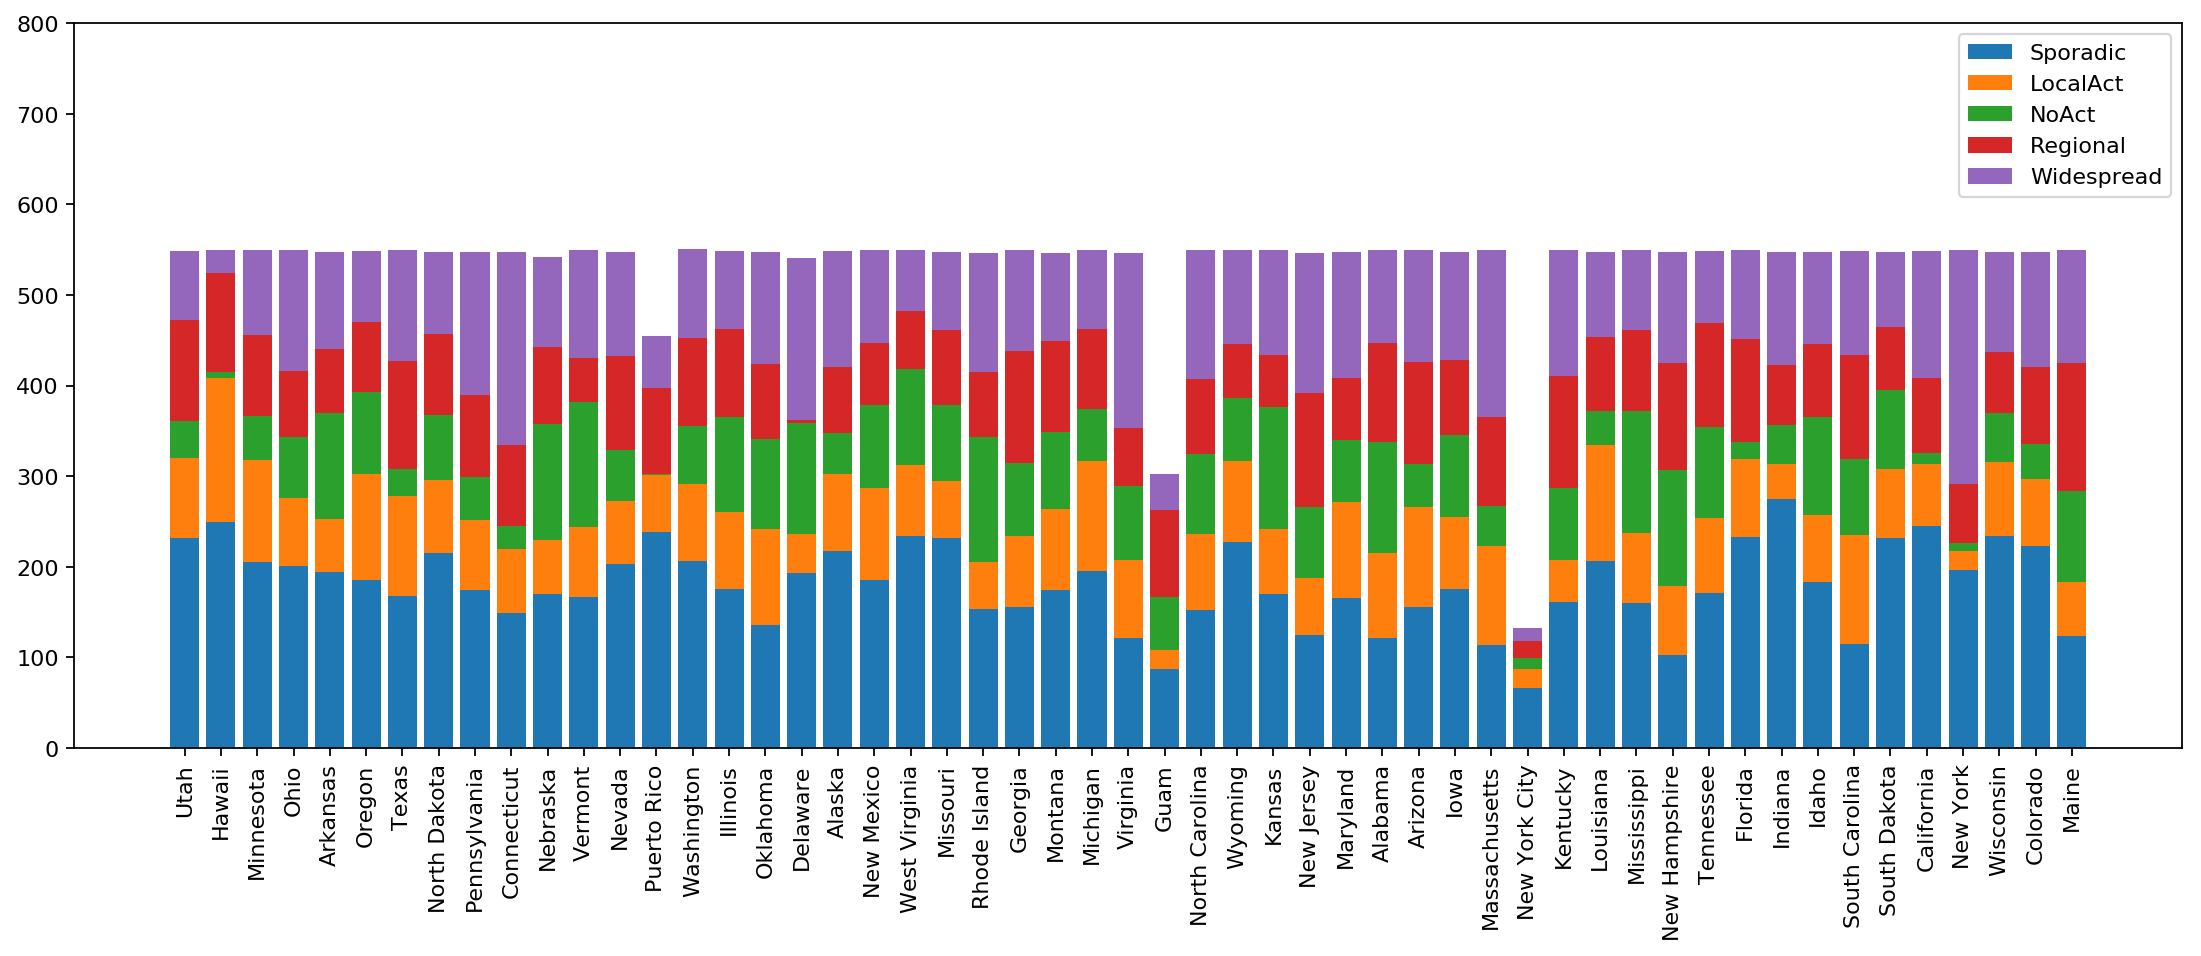

In [111]:

from matplotlib.pyplot import figure
figure(num=None, figsize=(17, 6), dpi=160, facecolor='w', edgecolor='k')

data = [CSpo['NSporadic'],CLoc['NLocalAct'],CNoAct['NNoAct'],CReg['NRegional'],CWide['NWidespread']]
ind = np.arange(len(CSpo['STATENAME2']))
print(len(data[2]))
y_offset = np.zeros(len(CSpo['STATENAME2']))
p=[]
for row in range(0,5):
    #print(row)
    #print(( data[row]))
    p.append(plt.bar(ind, data[row], bottom=y_offset))
    y_offset = y_offset + data[row]


plt.xticks(ind,np.array(CSpo['STATENAME2']),rotation=90)
plt.yticks(np.arange(0, 860, 100))
plt.legend((p[0][0], p[1][0],p[2][0],p[3][0],p[4][0],), ('Sporadic', 'LocalAct','NoAct','Regional','Widespread'))
plt.show()


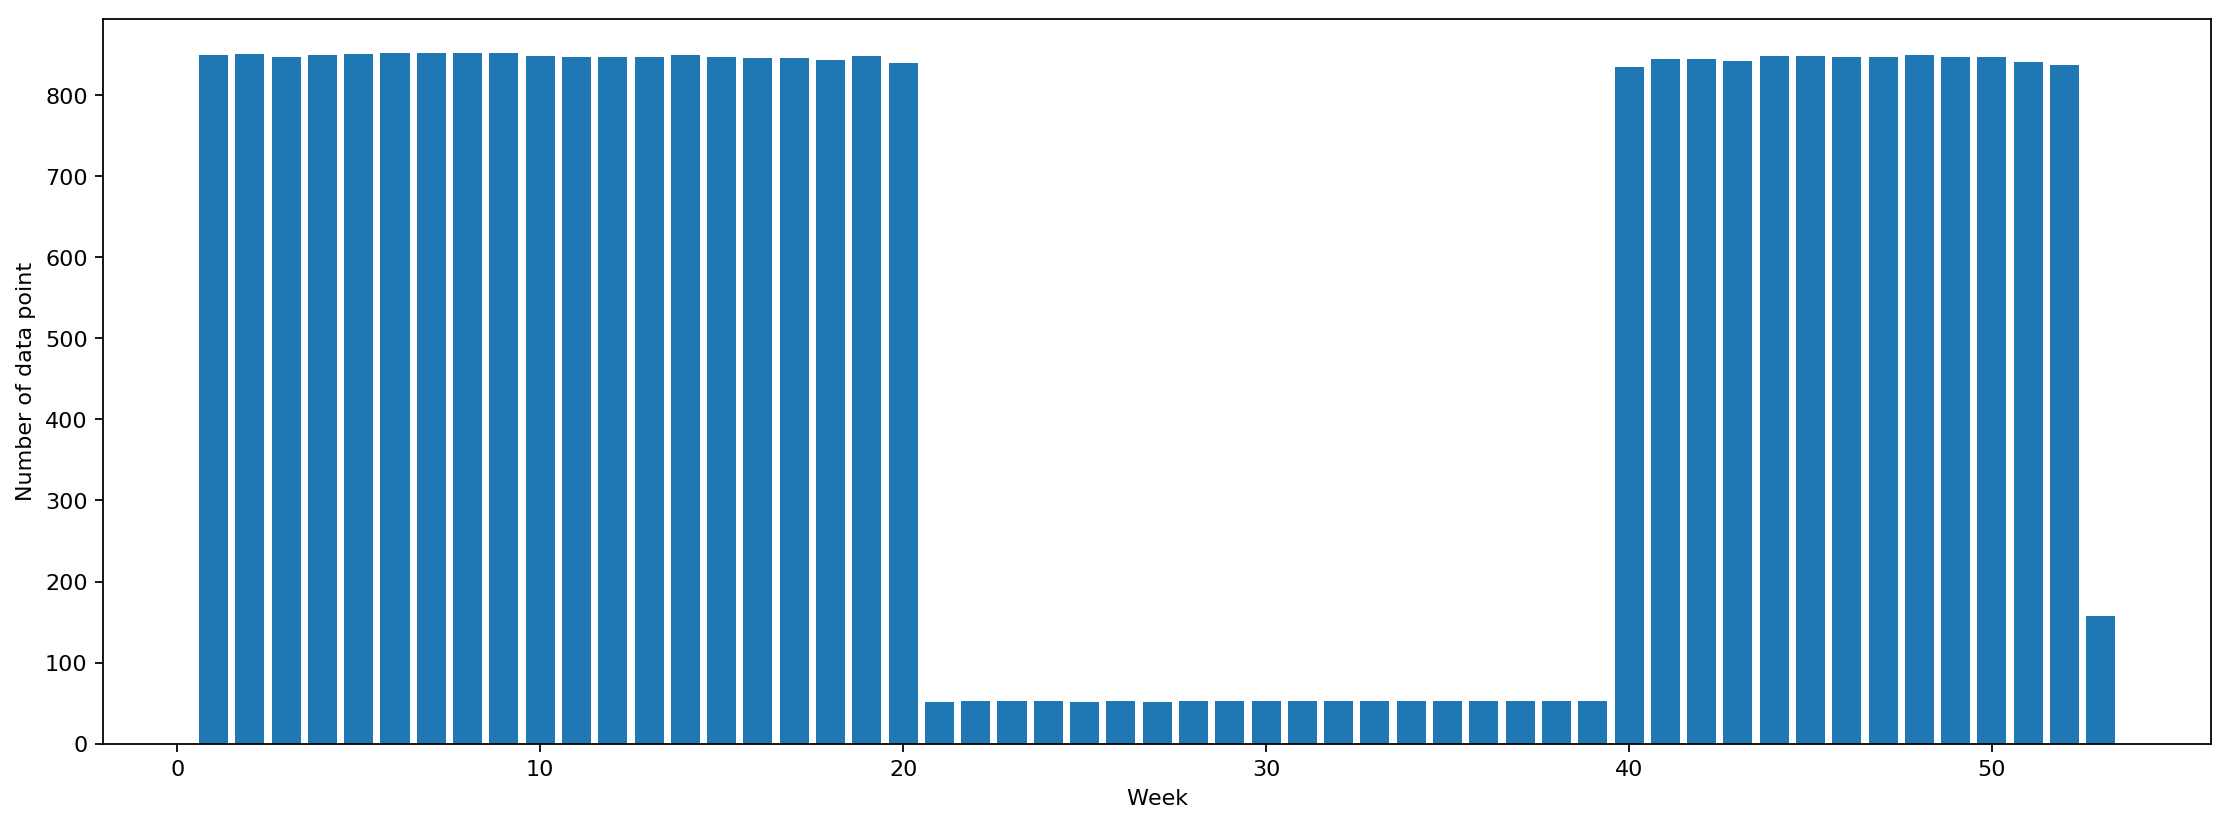

In [134]:
weekData = Flu.groupBy("WEEK").count().withColumnRenamed('count', 'Ndata')

weekData = weekData.toPandas()
weekData = weekData.astype({"WEEK": int})
weekData = weekData.sort_values(by = 'WEEK')
#print(weekData)

figure(num=None, figsize=(17, 6), dpi=160, facecolor='w', edgecolor='k')

plt.bar(np.array(np.array(weekData['WEEK'])), weekData['Ndata'])
plt.xlabel('Week')
plt.ylabel('Number of data point')
plt.show()


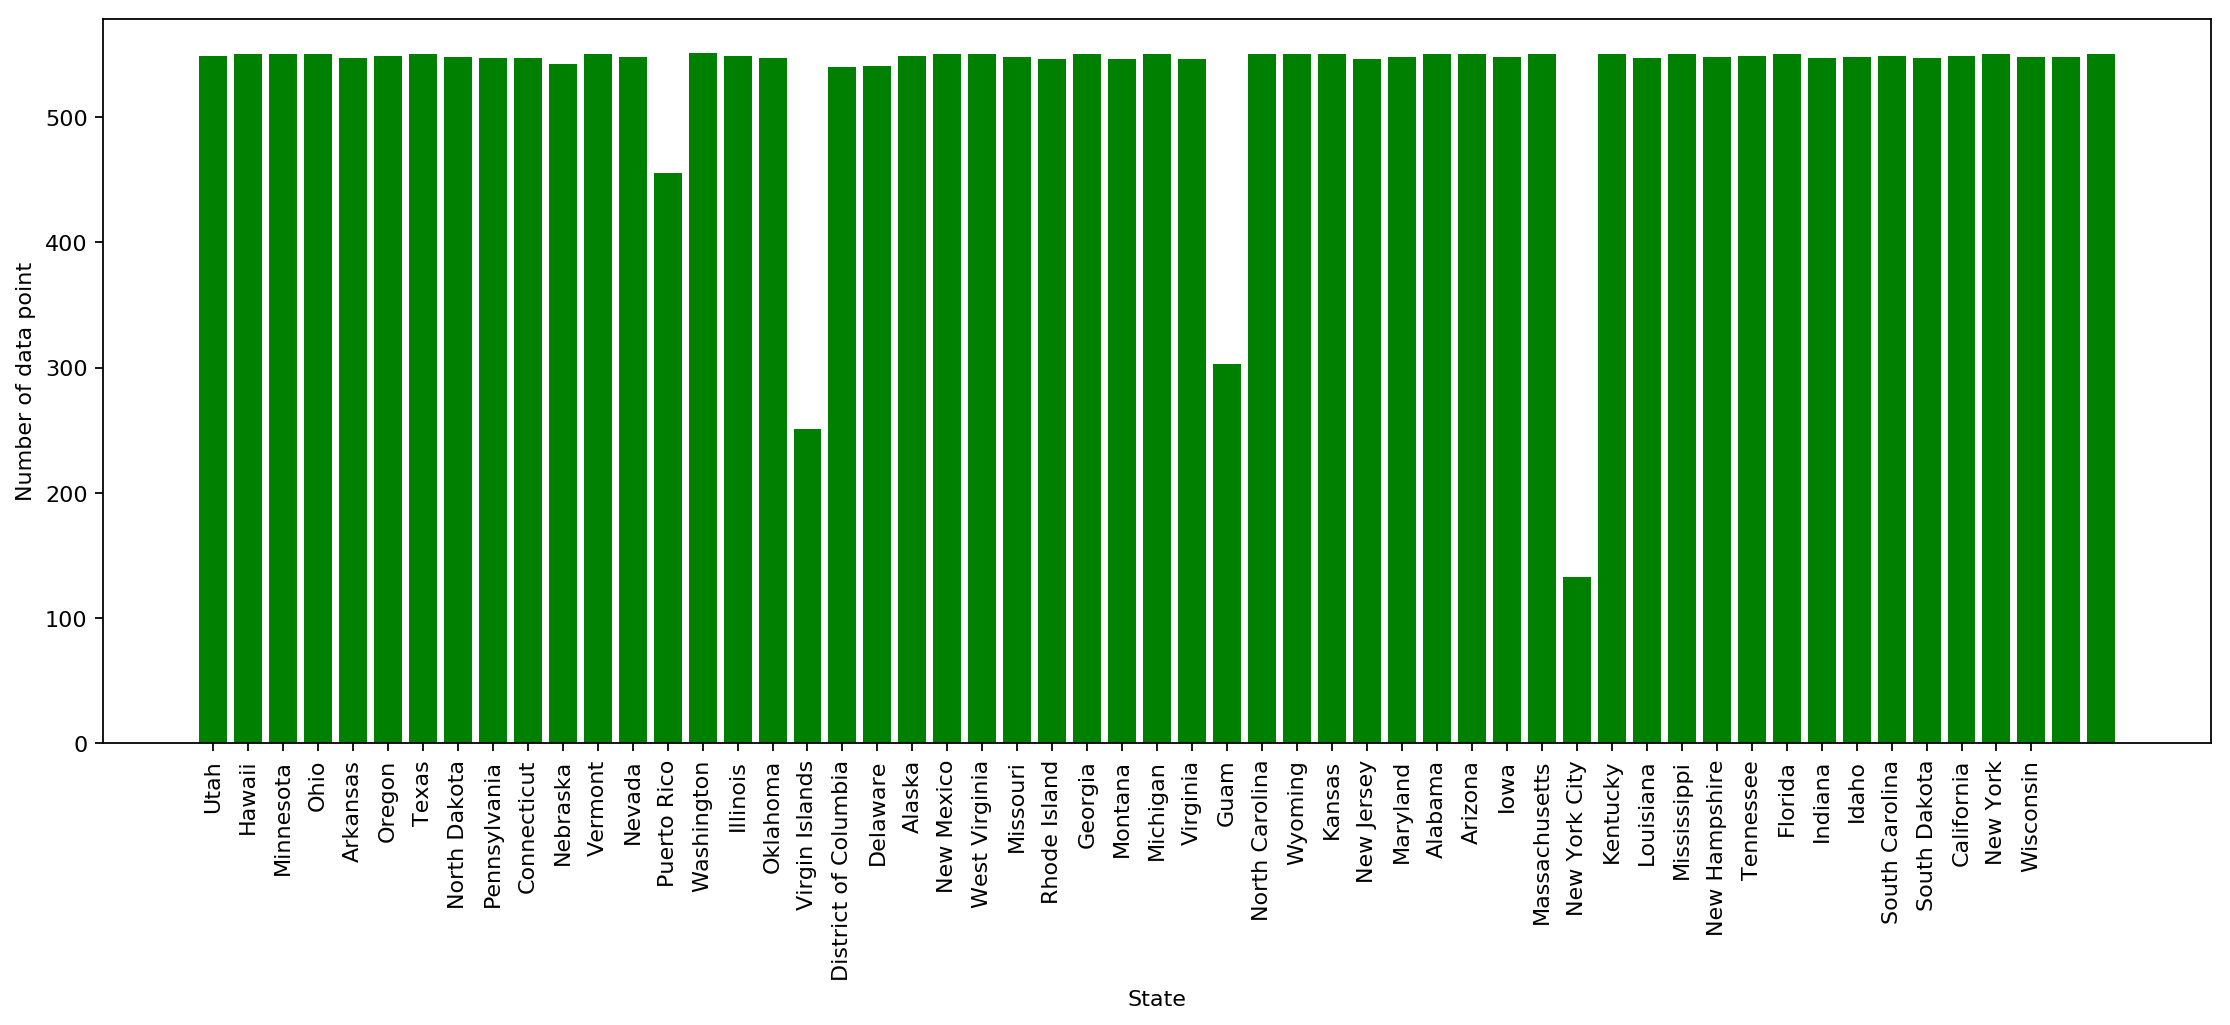

In [140]:
StateData = Flu.groupBy("STATENAME").count().withColumnRenamed('count', 'Ndata')

StateData = StateData.toPandas()

#print(weekData)

figure(num=None, figsize=(17, 6), dpi=160, facecolor='w', edgecolor='k')

plt.bar(np.array(np.array(StateData['STATENAME'])), StateData['Ndata'],color='green')
plt.xlabel('State')
plt.ylabel('Number of data point')
plt.xticks(ind,np.array(StateData['STATENAME']),rotation=90)
plt.show()